In [19]:
from matplotlib import pyplot as plt
import os
import json
import numpy as np

from data_load import TraceLoader

In [6]:
with open("data-3/manifest.json") as f:
    manifest = json.load(f)
print(manifest)

{'wasm/polybench/2mm.wasm': 1, 'wasm/polybench/3mm.wasm': 2, 'wasm/polybench/adi.wasm': 3, 'wasm/polybench/atax.wasm': 4, 'wasm/polybench/bicg.wasm': 5, 'wasm/polybench/cholesky.wasm': 6, 'wasm/polybench/correlation.wasm': 7, 'wasm/polybench/covariance.wasm': 8, 'wasm/polybench/deriche.wasm': 9, 'wasm/polybench/doitgen.wasm': 10, 'wasm/polybench/durbin.wasm': 11, 'wasm/polybench/fdtd-2d.wasm': 12, 'wasm/polybench/floyd-warshall.wasm': 13, 'wasm/polybench/gemm.wasm': 14, 'wasm/polybench/gemver.wasm': 15, 'wasm/polybench/gesummv.wasm': 16, 'wasm/polybench/gramschmidt.wasm': 17, 'wasm/polybench/heat-3d.wasm': 18, 'wasm/polybench/jacobi-1d.wasm': 19, 'wasm/polybench/jacobi-2d.wasm': 20, 'wasm/polybench/ludcmp.wasm': 21, 'wasm/polybench/lu.wasm': 22, 'wasm/polybench/mvt.wasm': 23, 'wasm/polybench/nussinov.wasm': 24, 'wasm/polybench/seidel-2d.wasm': 25, 'wasm/polybench/symm.wasm': 26, 'wasm/polybench/syr2k.wasm': 27, 'wasm/polybench/syrk.wasm': 28, 'wasm/polybench/trisolv.wasm': 29, 'wasm/po

In [10]:
runtimes = {
    'hc-10': '3eef3630-9fc7-49b8-8c37-d810d79bb0c4',
    'hc-11': '5fcfc221-a11e-45a4-93fc-b27008dbe503',
    'hc-12': 'bc64d4ad-9e26-4eda-8bc8-b88d150e23c0',
    'hc-13': 'b9ddaffc-aff2-47ef-b07d-38b1158f5539',
    'hc-14': 'f28256e4-b64a-4abf-86c8-b31180d4a356',
    'hc-15': 'e29ceeb3-12d6-415a-9a69-86cb27c7782b',
    'hc-16': '5a666f35-dc65-4276-9557-1e6b6a0e6415',
    'hc-20': 'bfdd1810-487b-471f-96a5-25a2180bfa86',
    'hc-21': 'e9721466-eeb8-4a84-a7a4-da26da5d4b34',
    'hc-22': '2d5234b9-6176-4ac8-9335-b114aa8ed962'
}

In [11]:
data = {
    k.split("/")[-1].split('.')[0]: TraceLoader("data-3/file-{}".format(v))
    for k, v in manifest.items()
}

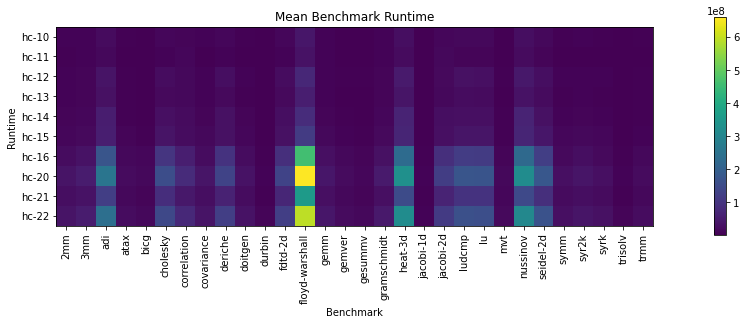

In [89]:
mat = np.zeros((30, 10), dtype=np.uint64)

for i, (bench, container) in enumerate(data.items()):
    for j, (rt, rt_id) in enumerate(runtimes.items()):
        mat[i][j] = np.mean(container.filter(runtime_id=rt_id)['runtime'])

fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [50, 1]})

ax = axs[0]
ims = ax.imshow(mat.T)
ax.set_ylabel("Runtime")
ax.set_yticks(np.arange(10))
ax.set_yticklabels(list(runtimes.keys()))

ax.set_xlabel("Benchmark")
ax.set_xticks(np.arange(30))
ax.set_xticklabels(list(data.keys()), rotation='vertical')

fig.colorbar(ims, cax=axs[1])

_ = ax.set_title("Mean Benchmark Runtime")

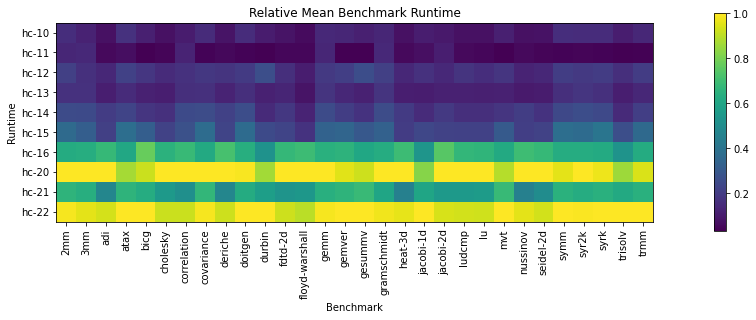

In [97]:
mat_norm = np.zeros((30, 10), dtype=np.float64)

for i, (bench, container) in enumerate(data.items()):
    for j, (rt, rt_id) in enumerate(runtimes.items()):
        mat_norm[i][j] = np.mean(container.filter(runtime_id=rt_id)['runtime'])

for i in range(30):
    mat_norm[i] = mat_norm[i] / np.max(mat_norm[i])

fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [50, 1]})

ax = axs[0]
ims = ax.imshow(mat_norm.T)
ax.set_ylabel("Runtime")
ax.set_yticks(np.arange(10))
ax.set_yticklabels(list(runtimes.keys()))

ax.set_xlabel("Benchmark")
ax.set_xticks(np.arange(30))
ax.set_xticklabels(list(data.keys()), rotation='vertical')

fig.colorbar(ims, cax=axs[1])

_ = ax.set_title("Relative Mean Benchmark Runtime")

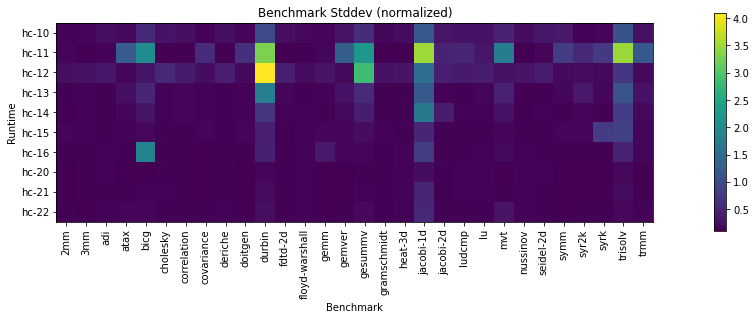

In [94]:
mat_std = np.zeros((30, 10), dtype=np.float64)

for i, (bench, container) in enumerate(data.items()):
    for j, (rt, rt_id) in enumerate(runtimes.items()):
        mat_std[i][j] = np.sqrt(np.var(container.filter(runtime_id=rt_id)['runtime']))

mat_std = mat_std / mat

fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [50, 1]})

ax = axs[0]
ims = ax.imshow(mat_std.T)
ax.set_ylabel("Runtime")
ax.set_yticks(np.arange(10))
ax.set_yticklabels(list(runtimes.keys()))

ax.set_xlabel("Benchmark")
ax.set_xticks(np.arange(30))
ax.set_xticklabels(list(data.keys()), rotation='vertical')

fig.colorbar(ims, cax=axs[1])

_ = ax.set_title("Benchmark Stddev (normalized)")

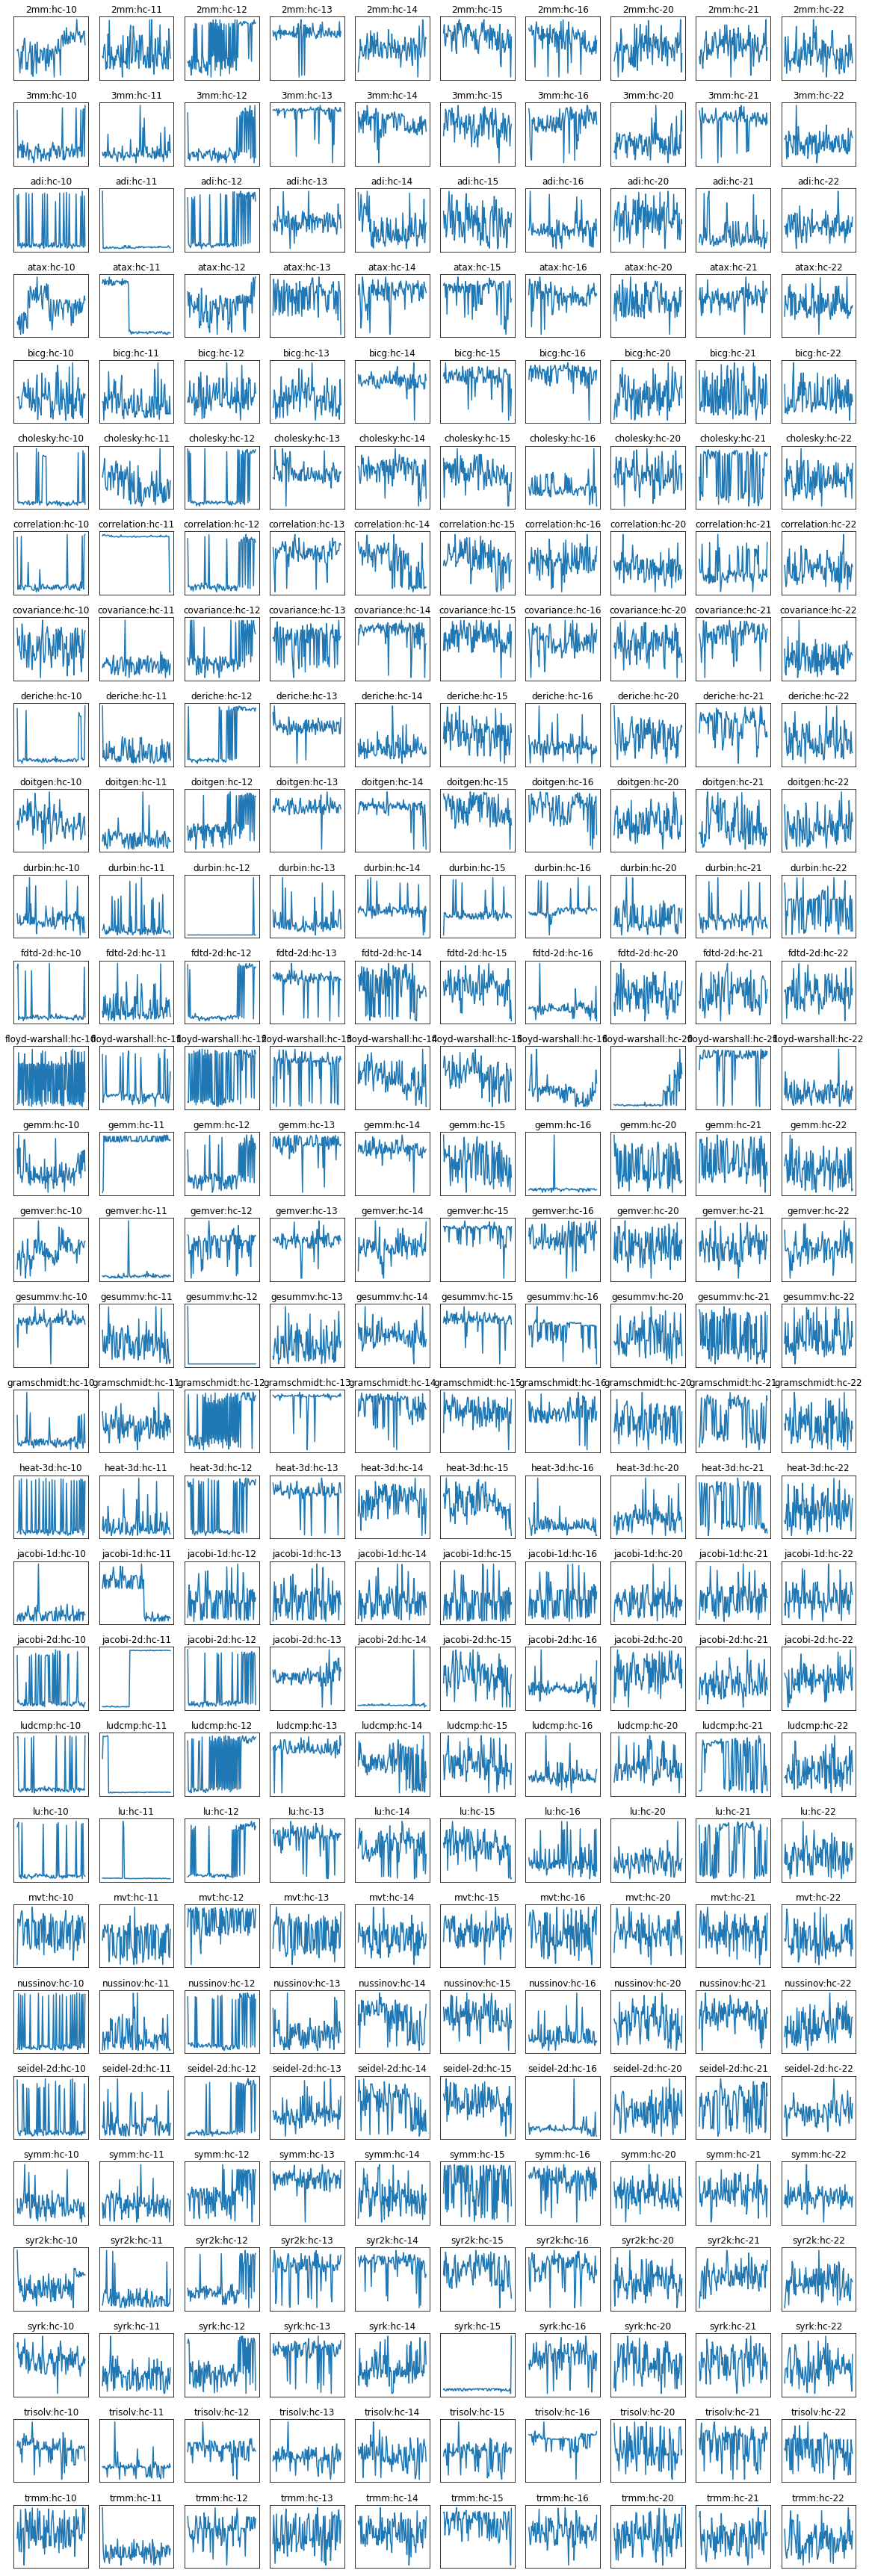

In [53]:
fig, axs = plt.subplots(30, 10, figsize=(16, 48))

for row, (bench, container) in zip(axs, data.items()):
    for ax, (rt, rt_id) in zip(row, runtimes.items()):
        df = container.filter(runtime_id=rt_id)
        ax.plot(df['runtime'].to_numpy()[1:-1])
        ax.set_title("{}:{}".format(bench, rt))
        ax.set_xticks([])
        ax.set_yticks([])
fig.tight_layout()

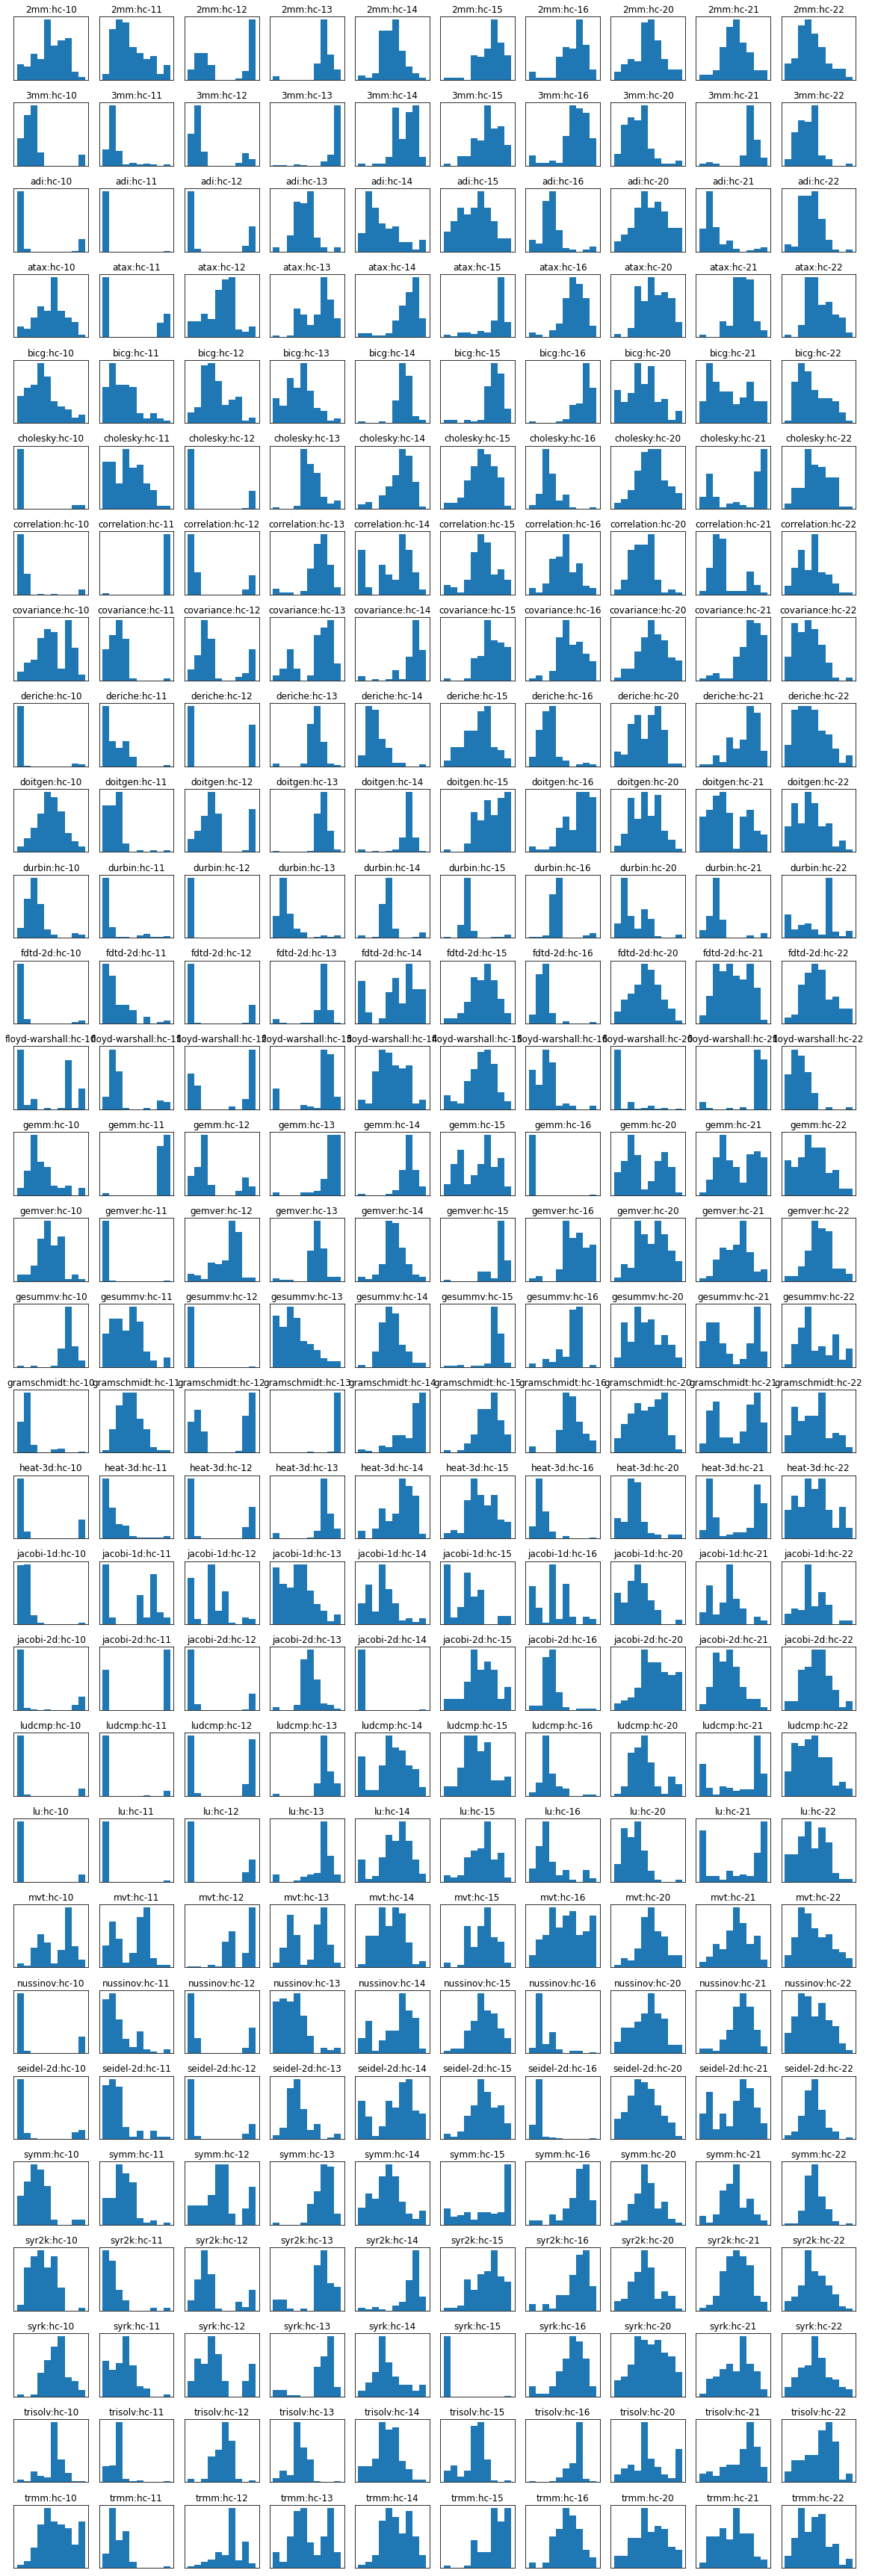

In [63]:
fig, axs = plt.subplots(30, 10, figsize=(16, 48))

for row, (bench, container) in zip(axs, data.items()):
    for ax, (rt, rt_id) in zip(row, runtimes.items()):
        df = container.filter(runtime_id=rt_id)
        ax.hist(df['runtime'].to_numpy()[1:-1])
        ax.set_title("{}:{}".format(bench, rt))
        ax.set_xticks([])
        ax.set_yticks([])
fig.tight_layout()

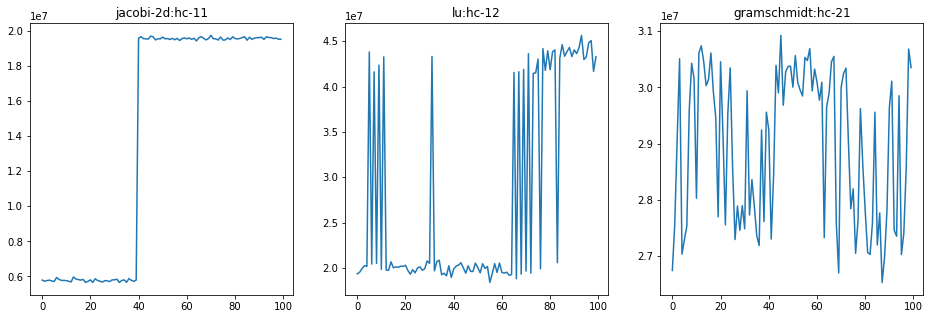

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

for (k, rt), ax in zip([('jacobi-2d', 'hc-11'), ('lu', 'hc-12'), ('gramschmidt', 'hc-21')], axs):
    df = data[k].filter(runtime_id=runtimes[rt])
    ax.plot(df['runtime'].to_numpy()[1:-1])
    ax.set_title("{}:{}".format(k, rt))
